## Loading the Datasets

In [45]:
import pandas as pd
df = pd.read_csv("NASA_resources\\cumulative_2025.10.04_09.07.19.csv")

In [46]:
df

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10090151,K07985.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,-1.757,0.068,2.763,0.074,2.344,0.072,-1.756,0.068,2.929,0.072
9560,9561,10128825,K07986.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.497,0,...,-0.250,0.490,0.780,0.460,0.500,0.400,-0.180,0.470,0.530,0.470
9561,9562,10147276,K07987.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.021,0,...,-3.650,0.260,5.000,0.220,3.380,0.160,-3.890,0.260,5.160,0.220
9562,9563,10155286,K07988.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.092,0,...,1.320,0.670,1.690,0.530,1.450,0.110,1.370,0.660,2.000,0.460


In [47]:
df.isnull().sum()

rowid                    0
kepid                    0
kepoi_name               0
kepler_name           6817
koi_disposition          0
                      ... 
koi_dikco_mra_err      570
koi_dikco_mdec         570
koi_dikco_mdec_err     570
koi_dikco_msky         570
koi_dikco_msky_err     570
Length: 141, dtype: int64

# Regex + Cleaning

In [48]:
import re
def clean_rastr(text):
    ans = re.split("[^0-9]",text)[::-1]
    new_text =0
    scale_factor=1
    for i in range(1, len(ans)-1):
        new_text += int(ans[i])*scale_factor
        scale_factor*=60
    new_text += int(ans[len(ans)-1])*24
    return new_text

In [49]:
def clean_decstr(text):
    symbol = text[0]
    ans = re.split("[^0-9]",text)[::-1]
    new_text =0
    scale_factor =1
    for i in range(1, len(ans)-2):
        new_text += int(ans[i])*scale_factor
        scale_factor*=60
    if symbol == "-":
        new_text *=-1
    new_text += int(ans[len(ans)-2]) * 24
    return new_text

In [50]:
cleaned_columns = [col for col in df.columns if df[col].isnull().sum() == 0]
print(cleaned_columns)
cleaned_df = df[cleaned_columns]
cleaned_df

['rowid', 'kepid', 'kepoi_name', 'koi_disposition', 'koi_vet_stat', 'koi_vet_date', 'koi_pdisposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_disp_prov', 'koi_period', 'koi_time0bk', 'koi_time0', 'koi_duration', 'koi_fittype', 'koi_parm_prov', 'koi_count', 'ra', 'dec']


,rowid,kepid,kepoi_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_disp_prov,koi_period,koi_time0bk,koi_time0,koi_duration,koi_fittype,koi_parm_prov,koi_count,ra,dec
0,1,10797460,K00752.01,CONFIRMED,Done,2018-08-16,CANDIDATE,0,0,0,...,q1_q17_dr25_sup_koi,9.488036,170.538750,2455003.539,2.95750,LS+MCMC,q1_q17_dr25_koi,2,291.93423,48.141651
1,2,10797460,K00752.02,CONFIRMED,Done,2018-08-16,CANDIDATE,0,0,0,...,q1_q17_dr25_sup_koi,54.418383,162.513840,2454995.514,4.50700,LS+MCMC,q1_q17_dr25_koi,2,291.93423,48.141651
2,3,10811496,K00753.01,CANDIDATE,Done,2018-08-16,CANDIDATE,0,0,0,...,q1_q17_dr25_sup_koi,19.899140,175.850252,2455008.850,1.78220,LS+MCMC,q1_q17_dr25_koi,1,297.00482,48.134129
3,4,10848459,K00754.01,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0,1,0,...,q1_q17_dr25_sup_koi,1.736952,170.307565,2455003.308,2.40641,LS+MCMC,q1_q17_dr25_koi,1,285.53461,48.285210
4,5,10854555,K00755.01,CONFIRMED,Done,2018-08-16,CANDIDATE,0,0,0,...,q1_q17_dr25_sup_koi,2.525592,171.595550,2455004.596,1.65450,LS+MCMC,q1_q17_dr25_koi,1,288.75488,48.226200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10090151,K07985.01,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0,1,1,...,q1_q17_dr25_sup_koi,0.527699,131.705093,2454964.705,3.22210,LS+MCMC,q1_q17_dr25_koi,1,297.18875,47.093819
9560,9561,10128825,K07986.01,CANDIDATE,Done,2018-08-16,CANDIDATE,0,0,0,...,q1_q17_dr25_sup_koi,1.739849,133.001270,2454966.001,3.11400,LS+MCMC,q1_q17_dr25_koi,1,286.50937,47.163219
9561,9562,10147276,K07987.01,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0,0,1,...,q1_q17_dr25_sup_koi,0.681402,132.181750,2454965.182,0.86500,LS+MCMC,q1_q17_dr25_koi,1,294.16489,47.176281
9562,9563,10155286,K07988.01,CANDIDATE,Done,2018-08-16,CANDIDATE,0,0,0,...,q1_q17_dr25_sup_koi,333.486169,153.615010,2454986.615,3.19900,LS+MCMC,q1_q17_dr25_koi,1,296.76288,47.145142


## Selecting Features

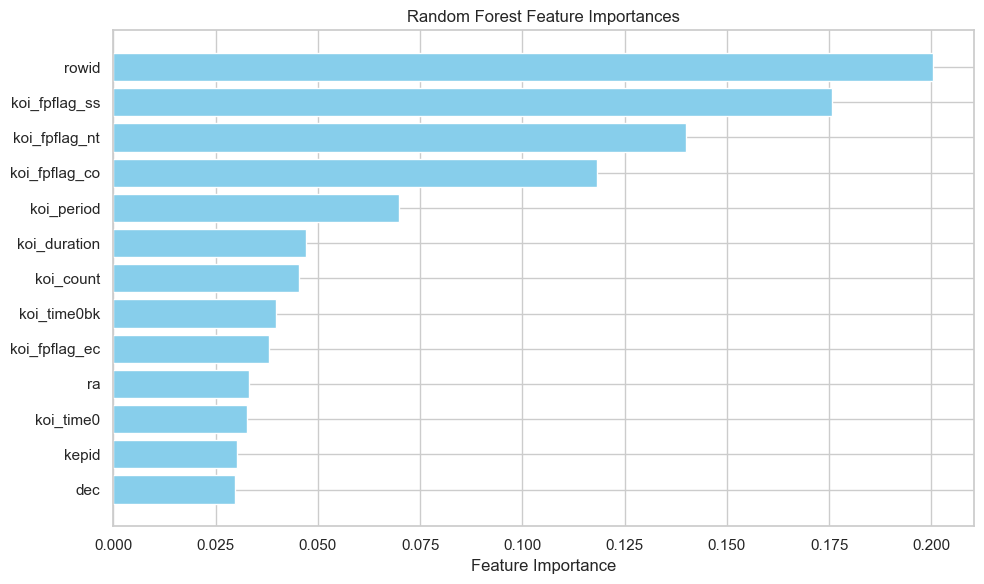

          Feature  Importance
0           rowid    0.200394
3   koi_fpflag_ss    0.175719
2   koi_fpflag_nt    0.139939
4   koi_fpflag_co    0.118160
6      koi_period    0.069792
9    koi_duration    0.046991
10      koi_count    0.045308
7     koi_time0bk    0.039678
5   koi_fpflag_ec    0.038025
11             ra    0.033249


In [51]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = cleaned_df.drop(columns=['koi_pdisposition']) 
y = cleaned_df['koi_disposition']
# Keep only numeric columns
X_numeric = X.select_dtypes(include=['number'])

# fill in missing values
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X_numeric), columns=X_numeric.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# model = trandom forest
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# feature importances
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X_numeric.columns, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# plottt
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

# Optionally print top 10 features
print(feat_imp_df.head(10))

In [52]:
features = ['koi_fpflag_ss', 'koi_fpflag_nt', 'koi_fpflag_co', 'koi_duration','koi_time0bk','koi_fpflag_ec','ra']
cleaned_df = cleaned_df.dropna(subset=features+['koi_disposition'])

X = cleaned_df[features]
y = (cleaned_df["koi_disposition"] == "CONFIRMED").astype(int)

In [53]:
y

0       1
1       1
2       0
3       0
4       1
       ..
9559    0
9560    0
9561    0
9562    0
9563    0
Name: koi_disposition, Length: 9564, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
X_train

,koi_fpflag_ss,koi_fpflag_nt,koi_fpflag_co,koi_duration,koi_time0bk,koi_fpflag_ec,ra
8117,0,1,1,1.8200,131.729560,1,282.15744
5245,0,0,0,2.4212,140.468500,0,285.71191
5865,0,0,1,1.8950,132.167860,0,297.19012
4050,1,0,1,4.9200,262.400220,0,293.20773
5130,0,0,0,4.6520,133.261200,0,296.65256
...,...,...,...,...,...,...,...
5734,0,0,1,4.3840,133.064250,0,298.57697
5191,0,0,0,8.6640,197.201870,0,295.94827
5390,1,0,1,5.0834,132.303851,1,297.54337
860,0,0,0,1.6493,181.295660,0,284.20966


# Scaling the Values

In [74]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import joblib

# initialize the scalar
mm = MinMaxScaler()

for col in X.columns:
    X[col] = mm.fit_transform(np.array(X[col]).reshape(-1,1))
    print(col)
    joblib.dump(mm,f'{col}.pkl')

koi_fpflag_ss
koi_fpflag_nt
koi_fpflag_co
koi_duration
koi_time0bk
koi_fpflag_ec
ra


C:\Users\aakas\AppData\Local\Temp\ipykernel_39700\2770251626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = mm.fit_transform(np.array(X[col]).reshape(-1,1))
C:\Users\aakas\AppData\Local\Temp\ipykernel_39700\2770251626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = mm.fit_transform(np.array(X[col]).reshape(-1,1))
C:\Users\aakas\AppData\Local\Temp\ipykernel_39700\2770251626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [57]:
X

,koi_fpflag_ss,koi_fpflag_nt,koi_fpflag_co,koi_duration,koi_time0bk,koi_fpflag_ec,ra
0,0.0,0.0,0.0,0.020980,0.036999,0.0,0.552473
1,0.0,0.0,0.0,0.032169,0.031063,0.0,0.552473
2,0.0,0.0,0.0,0.012494,0.040928,0.0,0.784346
3,1.0,0.0,0.0,0.017001,0.036828,0.0,0.259826
4,0.0,0.0,0.0,0.011571,0.037781,0.0,0.407085
...,...,...,...,...,...,...,...
9559,1.0,0.0,1.0,0.022891,0.008276,0.0,0.792756
9560,0.0,0.0,0.0,0.022110,0.009235,0.0,0.304401
9561,0.0,0.0,1.0,0.005871,0.008629,0.0,0.654479
9562,0.0,0.0,0.0,0.022724,0.024481,0.0,0.773282


In [58]:
y.value_counts()

koi_disposition
0    6818
1    2746
Name: count, dtype: int64

# Apply SMOTE

In [59]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# split the data
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# initalize smote
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


Before SMOTE: koi_disposition
0    5474
1    2177
Name: count, dtype: int64
After SMOTE: koi_disposition
0    5474
1    5474
Name: count, dtype: int64


In [60]:
X_train

,koi_fpflag_ss,koi_fpflag_nt,koi_fpflag_co,koi_duration,koi_time0bk,koi_fpflag_ec,ra
8117,0.0,0.002151,1.0,0.012766,0.008294,1.0,0.105392
5245,0.0,0.000000,0.0,0.017108,0.014758,0.0,0.267934
5865,0.0,0.000000,1.0,0.013308,0.008618,0.0,0.792819
4050,1.0,0.000000,1.0,0.035151,0.104944,0.0,0.610709
5130,0.0,0.000000,0.0,0.033216,0.009427,0.0,0.768237
...,...,...,...,...,...,...,...
5734,0.0,0.000000,1.0,0.031281,0.009281,0.0,0.856238
5191,0.0,0.000000,0.0,0.062186,0.056720,0.0,0.736031
5390,1.0,0.000000,1.0,0.036331,0.008719,1.0,0.808973
860,0.0,0.000000,0.0,0.011534,0.044955,0.0,0.199238


In [61]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ("clf",GradientBoostingClassifier(random_state=42))
])

pipeline.fit(X_train,y_train)

y_pred = pipeline.predict(X_test)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F-Score: {fscore}')

Precision: 0.7920584334606782
Recall: 0.8472845531006779
F-Score: 0.7940518698538213


## Training the Models

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import joblib
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    f1_score,
    precision_score,
    recall_score
)

models = {
    "Logistic": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "LightGBM": LGBMClassifier()
}

results = []

for name, model in models.items():
    pipeline = Pipeline([
        ("smote",SMOTE(random_state=42)),
        ("clf",model)
    ])
    
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:,1]
    
    acc = accuracy_score(y_test,y_pred)
    auc = roc_auc_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred, average="macro")
    precision = precision_score(y_test,y_pred,average="macro")
    recall = recall_score(y_test,y_pred,average="macro")
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "AUC": auc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })
    joblib.dump(model,f'{name}.pkl')
    print(f"{name}: Accuracy:{acc:.3f}, AUC={auc:.3f}, F1={f1:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}\n")

Logistic: Accuracy:0.719, AUC=0.784, F1=0.712
Precision: 0.740
Recall: 0.784
F1-Score: 0.712

Random Forest: Accuracy:0.813, AUC=0.833, F1=0.796
Precision: 0.787
Recall: 0.833
F1-Score: 0.796

Gradient Boosting: Accuracy:0.806, AUC=0.847, F1=0.794
Precision: 0.792
Recall: 0.847
F1-Score: 0.794

[LightGBM] [Info] Number of positive: 5474, number of negative: 5474
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 774
[LightGBM] [Info] Number of data points in the train set: 10948, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM: Accuracy:0.812, AUC=0.844, F1=0.798
Precision: 0.792
Recall: 0.844
F1-Score: 0.798



In [63]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="AUC", ascending=False)
results_df

,Model,Accuracy,AUC,Precision,Recall,F1 Score
2,Gradient Boosting,0.806064,0.847285,0.792058,0.847285,0.794052
3,LightGBM,0.812337,0.844148,0.791997,0.844148,0.798339
1,Random Forest,0.813382,0.833238,0.787035,0.833238,0.796433
0,Logistic,0.718766,0.784143,0.739559,0.784143,0.711724


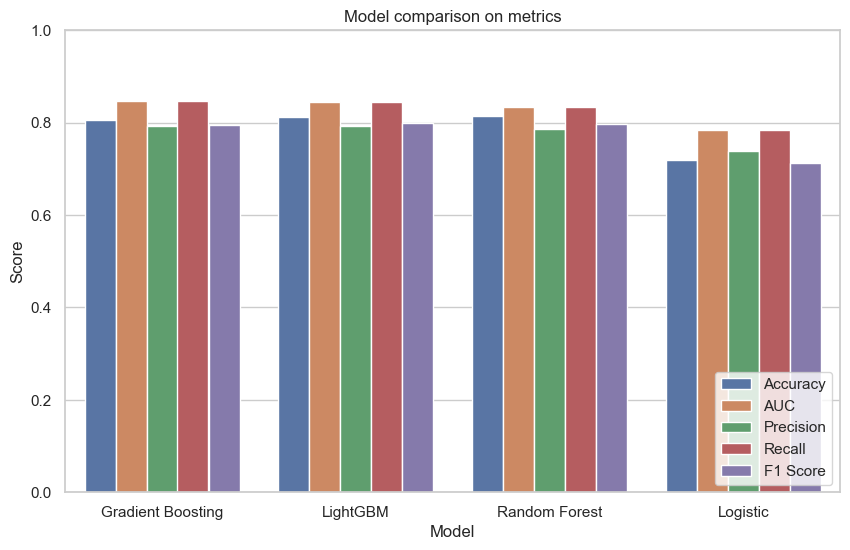

In [64]:
import seaborn as sns

# plot
sns.set(style="whitegrid")

df_melted = results_df.melt(id_vars="Model",var_name ="Metric",value_name="Score")

plt.figure(figsize=(10,6))
sns.barplot(data=df_melted,x="Model",y="Score", hue="Metric")
plt.title("Model comparison on metrics")
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.show()

In [65]:
X.columns, len(X.columns)

(Index(['koi_fpflag_ss', 'koi_fpflag_nt', 'koi_fpflag_co', 'koi_duration',
        'koi_time0bk', 'koi_fpflag_ec', 'ra'],
       dtype='object'),
 7)

In [66]:
from torch.utils.data import Dataset, DataLoader
import torch

class CustomDataset(Dataset):
    def __init__(self,data,labels):
        self.data = data
        self.labels = labels
    def __len__(self):
        return len(self.data)
    def __getitem__(self,idx):
        y = self.data.iloc[idx]
        x = self.labels.iloc[idx].values
        
        x_tensor = torch.tensor(x,dtype=torch.float32)
        y_tensor = torch.tensor(y,dtype=torch.float32)
        
        return x_tensor,y_tensor

In [67]:
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.l1 = nn.Linear(input_size,100)
        self.l2 = nn.Linear(100,50)
        self.l3 = nn.Linear(50,output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    def forward(self,x):
        output = self.relu(self.l1(x))
        output = self.relu(self.l2(output))
        return self.sigmoid(self.l3(output)).squeeze()

In [68]:
def train_the_model(model, x_train, x_test, y_train, y_test, batch_size, learning_rate, num_epochs):
    train_loader = DataLoader(CustomDataset(x_train, y_train), batch_size=batch_size, shuffle=True, num_workers=2)
    test_loader = DataLoader(CustomDataset(x_test, y_test), batch_size=batch_size, shuffle=False, num_workers=2)

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    loss_fn = nn.BCELoss()

    best_weights = None
    min_loss = float('inf')
    training_losses = []
    testing_losses = []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        total_samples = 0

        training_all_probs = []
        training_all_preds = []
        training_all_labels = []

        for data, label in train_loader:
            label = label.float()
            output = model(data)  # assuming output is already sigmoid activated
            loss = loss_fn(output, label)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            preds = (output >= 0.5).int()

            training_all_probs.extend(output.detach().cpu().numpy())
            training_all_preds.extend(preds.detach().cpu().numpy())
            training_all_labels.extend(label.detach().cpu().numpy())

            batch_size_ = data.size(0)
            total_loss += loss.item() * batch_size_
            total_samples += batch_size_

        avg_train_loss = total_loss / total_samples
        training_losses.append(avg_train_loss)
        print(f'Epoch: [{epoch+1}/{num_epochs}] | Train Loss: {avg_train_loss:.4f}')

        training_all_probs = np.array(training_all_probs).flatten()
        training_all_preds = np.array(training_all_preds).flatten()
        training_all_labels = np.array(training_all_labels).flatten()

        model.eval()
        total_loss = 0
        total_samples = 0

        testing_all_probs = []
        testing_all_preds = []
        testing_all_labels = []

        with torch.no_grad():
            for data, label in test_loader:
                label = label.float()
                output = model(data)
                loss = loss_fn(output, label)

                preds = (output >= 0.5).int()

                testing_all_probs.extend(output.detach().cpu().numpy())
                testing_all_preds.extend(preds.detach().cpu().numpy())
                testing_all_labels.extend(label.detach().cpu().numpy())

                batch_size_ = data.size(0)
                total_loss += loss.item() * batch_size_
                total_samples += batch_size_

        avg_test_loss = total_loss / total_samples
        testing_losses.append(avg_test_loss)

        testing_all_probs = np.array(testing_all_probs).flatten()
        testing_all_preds = np.array(testing_all_preds).flatten()
        testing_all_labels = np.array(testing_all_labels).flatten()

        if avg_test_loss < min_loss:
            min_loss = avg_test_loss
            best_weights = model.state_dict()

        # Optionally print metrics per epoch here
        # train_acc = accuracy_score(training_all_labels, training_all_preds)
        # test_acc = accuracy_score(testing_all_labels, testing_all_preds)
        # print(f'Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}')

    model.load_state_dict(best_weights)

    training_acc = accuracy_score(training_all_labels, training_all_preds)
    training_auc = roc_auc_score(training_all_labels, training_all_probs)
    training_precision = precision_score(training_all_labels, training_all_preds)
    training_recall = recall_score(training_all_labels, training_all_preds)
    training_f1 = f1_score(training_all_labels, training_all_preds)

    testing_acc = accuracy_score(testing_all_labels, testing_all_preds)
    testing_auc = roc_auc_score(testing_all_labels, testing_all_probs)
    testing_precision = precision_score(testing_all_labels, testing_all_preds)
    testing_recall = recall_score(testing_all_labels, testing_all_preds)
    testing_f1 = f1_score(testing_all_labels, testing_all_preds)

    return {
        'Accuracy': training_acc,
        'AUC': training_auc,
        'Precision': training_precision,
        'Recall': training_recall,
        'F1 Score': training_f1
    }, {
        'Accuracy': testing_acc,
        'AUC': testing_auc,
        'Precision': testing_precision,
        'Recall': testing_recall,
        'F1 Score': testing_f1
    }, (training_losses, testing_losses)

In [69]:
# model = NeuralNetwork(X_train.shape[1],len(y_train.unique())-1)
# batch_size=32
# learning_rate=1e-3
# num_epochs=10
# training, testing, (training_losses, testing_losses) = train_the_model(model, X_train_resampled, X_test, y_train_resampled, y_test, batch_size, learning_rate, num_epochs)

In [70]:
# training_results = pd.DataFrame([training])
# training_results

In [71]:
# testing_results = pd.DataFrame([testing])
# testing_results

In [72]:
# import matplotlib.pyplot as plt
# def display_graphs(training_losses,testing_losses,num_epochs,model_name):
#     x = range(num_epochs)
#     plt.plot(x,training_losses,color="red")
#     plt.plot(x,testing_losses,color="blue")
#     plt.xlabel("Epochs")
#     plt.ylabel("Losses")
#     plt.ylim(0,1)
#     plt.legend(["Training","Testing"])
#     plt.savefig(f'{model_name}.png')

# display_graphs(training_losses,testing_losses,num_epochs,"Neural Network")